In [1]:
#Let's start with importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import GridSearchCV


In [2]:
#read the data file
data = pd.read_csv("C:/Users/MY PC/OneDrive/Documents/Python Data Science/PWSkills Tuts/240323_171_ETE_Project_Decision_Tree_SVC/Dataset/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.drop(['Pregnancies', 'SkinThickness'], axis=1, inplace=True)

In [4]:
data.describe()

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.isnull().sum()

Glucose                     0
BloodPressure               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We can see there few data for columns Glucose , Insulin, skin thickenss, BMI and Blood Pressure which have value as 0. That's not possible,right? you can do a quick search to see that one cannot have 0 values for these.
Let's deal with that. we can either remove such data or simply replace it with their respective mean values.
Let's do the latter.

In [6]:
#here few misconception is there lke BMI can not be zero, BP can't be zero, glucose, insuline can't be zero so lets try to fix it
# now replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].median())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].median())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].median())

In [7]:
data.describe()

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.656250,72.386719,94.652344,32.450805,0.471876,33.240885,0.348958
std,30.438286,12.096642,105.547598,6.875374,0.331329,11.760232,0.476951
min,44.000000,24.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,99.750000,64.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

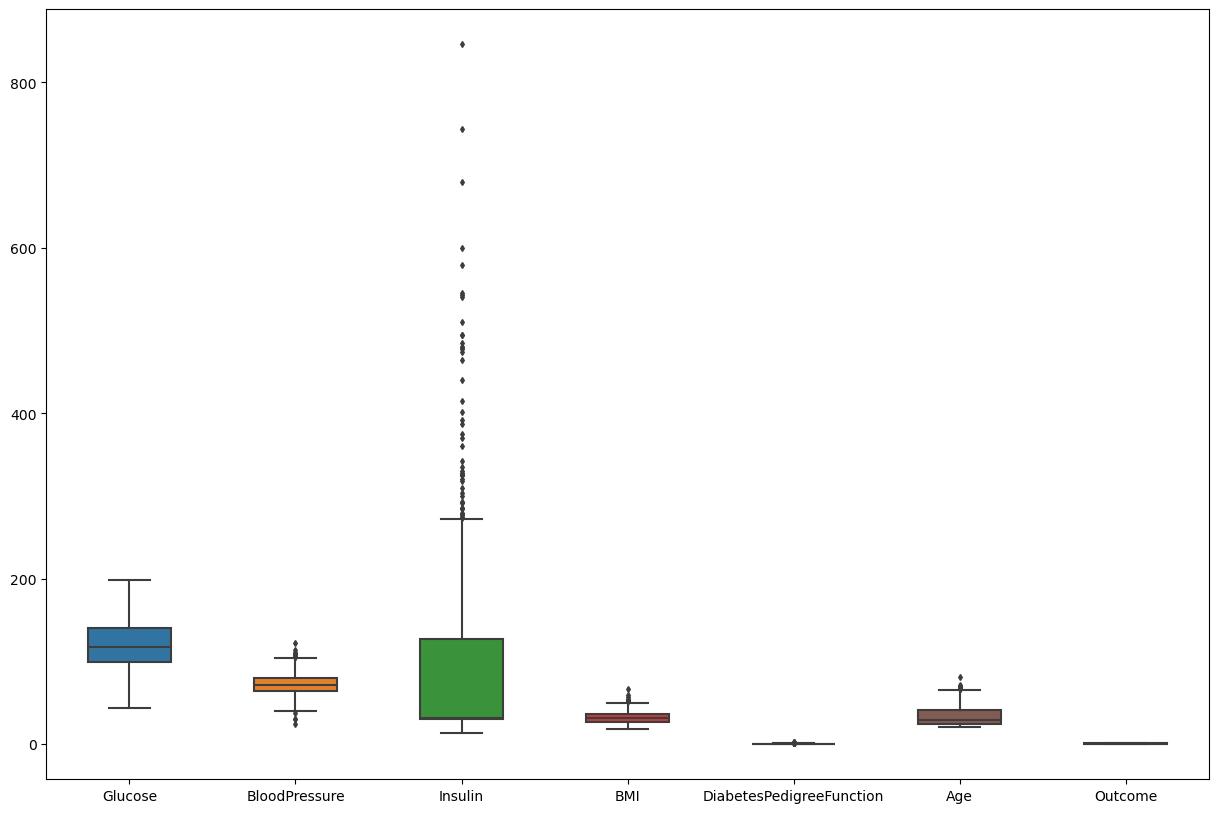

In [8]:
#now we have dealt with the 0 values and data looks better. But, there still are outliers present in some columns.lets visualize it
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [9]:
data.head()

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,30.5,33.6,0.627,50,1
1,85,66,30.5,26.6,0.351,31,0
2,183,64,30.5,23.3,0.672,32,1
3,89,66,94.0,28.1,0.167,21,0
4,137,40,168.0,43.1,2.288,33,1


In [10]:
#segregate the dependent and independent variable
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [11]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape, X_test.shape

((576, 6), (192, 6))

In [12]:
import pickle
##standard Scaling- Standardization
def scaler_standard(X_train, X_test):
    #scaling the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #saving the model
    file = open('C:/Users/MY PC/OneDrive/Documents/Python Data Science/PWSkills Tuts/240323_171_ETE_Project_Decision_Tree_SVC/Model/standardScaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    
    return X_train_scaled, X_test_scaled

In [13]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

In [14]:
X_train_scaled

array([[-1.09847803, -0.91178438, -0.63220935, -1.45561965, -0.98325882,
        -0.04863985],
       [-0.13223385, -1.24920025, -0.04167154,  0.09272955, -0.62493647,
        -0.88246592],
       [-1.0318405 ,  0.60658704, -0.63220935, -0.03629955,  0.39884168,
        -0.5489355 ],
       ...,
       [-0.9318842 , -0.65872248, -0.63220935, -1.14021518, -0.96519215,
        -1.04923114],
       [-1.23175309,  0.10046323, -0.63220935, -0.36604058, -0.5075031 ,
         0.11812536],
       [ 0.46750392,  0.77529498, -0.63220935, -0.09470985,  0.51627505,
         2.953134  ]])

## Decision Tree Classifier model training with Hyperparameter Tuning

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
parameters = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'max_features': ['auto', 'sqrt', 'log2'],
}

In [17]:
classifier = DecisionTreeClassifier()

In [18]:
clf = GridSearchCV(classifier, param_grid=parameters, cv=10, scoring='accuracy', verbose=3)
clf.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
[CV 1/10] END criterion=gini, max_depth=None, max_features=auto, splitter=best;, score=0.621 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=None, max_features=auto, splitter=best;, score=0.707 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=None, max_features=auto, splitter=best;, score=0.690 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=None, max_features=auto, splitter=best;, score=0.707 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=None, max_features=auto, splitter=best;, score=0.603 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=None, max_features=auto, splitter=best;, score=0.724 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=None, max_features=auto, splitter=best;, score=0.632 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=None, max_features=auto, splitter=best;, score=0.632 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [19]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [20]:
classifier = DecisionTreeClassifier(criterion='gini', max_depth=4, max_features='sqrt', splitter='best')

In [21]:
classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=4, max_features='sqrt')

In [22]:
y_pred = classifier.predict(X_test_scaled)

In [23]:
confusion_matrix(y_test, y_pred)

array([[104,  26],
       [ 20,  42]], dtype=int64)

In [24]:
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.7604166666666666

In [25]:
file = open('C:/Users/MY PC/OneDrive/Documents/Python Data Science/PWSkills Tuts/240323_171_ETE_Project_Decision_Tree_SVC/Model/DTCmodelForPrediction.pkl', 'wb')
pickle.dump(classifier, file)
file.close()

## Support Vector Classifier model training with Hyperparameter Tuning

In [26]:
parameters = {
    'C': [0.1,1,10,100],
    'gamma': [1,0.1,0.01,0.001],
    'kernel': ['linear','rbf', 'poly']
}

In [27]:
grid = GridSearchCV(estimator=SVC(), param_grid=parameters, refit=True, cv=3, verbose=3, scoring='accuracy', n_jobs=5)
grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=5,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=3)

In [28]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

In [29]:
svc_clf = SVC(C=10, gamma=1, kernel='linear')

In [30]:
svc_clf.fit(X_train_scaled, y_train)

SVC(C=10, gamma=1, kernel='linear')

In [31]:
y_pred = svc_clf.predict(X_test_scaled)

In [32]:
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.7916666666666666

In [33]:
file = open('C:/Users/MY PC/OneDrive/Documents/Python Data Science/PWSkills Tuts/240323_171_ETE_Project_Decision_Tree_SVC/Model/SVCmodelForPrediction.pkl', 'wb')
pickle.dump(svc_clf, file)
file.close()

# Naive Bayes BernoulliNB classifier model training with Hyperparameter Tuning

In [34]:
parameters = {
    'alpha': [0.05,0.1,0.2,0.3,0.4,0.5,1,1.5,2,2.5,3,3.5,4,4.5],
    'force_alpha': [True, False],
    'binarize': [0, 0.1,0.2,0.3,0.4,0.5,1,2]
}

In [35]:
grid = GridSearchCV(BernoulliNB(), param_grid=parameters, refit=True, cv=5, verbose=3, scoring='accuracy', n_jobs=5)
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 224 candidates, totalling 1120 fits


GridSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=5,
             param_grid={'alpha': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 1.5, 2,
                                   2.5, 3, 3.5, 4, 4.5],
                         'binarize': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2],
                         'force_alpha': [True, False]},
             scoring='accuracy', verbose=3)

In [36]:
grid.best_params_

{'alpha': 2.5, 'binarize': 0.2, 'force_alpha': True}

In [37]:
bnb = BernoulliNB(alpha=2.5, binarize=0.2, force_alpha=True)
bnb.fit(X_train_scaled, y_train)

BernoulliNB(alpha=2.5, binarize=0.2, force_alpha=True)

In [38]:
y_pred = bnb.predict(X_test_scaled)

In [39]:
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.7395833333333334

In [40]:
file = open('C:/Users/MY PC/OneDrive/Documents/Python Data Science/PWSkills Tuts/240323_171_ETE_Project_Decision_Tree_SVC/Model/BNBmodelForPrediction.pkl', 'wb')
pickle.dump(svc_clf, file)
file.close()